In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
new_data = data.drop('CustomerID', axis= 'columns')
new_data.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [25]:
num_cols = new_data.select_dtypes(include = np.number).columns.tolist()
num_cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

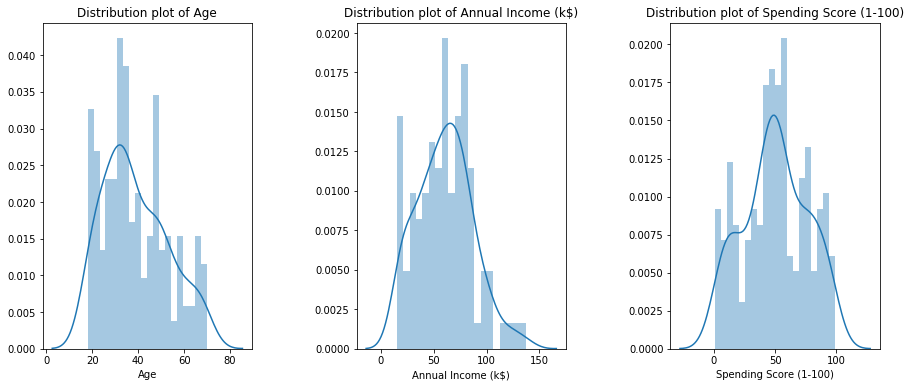

In [33]:
plt.figure(1, figsize = (15,6))
n = 1
for col in num_cols:
    plt.subplot(1, len(num_cols),n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[col], bins = 20)
    plt.title('Distribution plot of {}'.format(col))
    n+=1
plt.show()
   

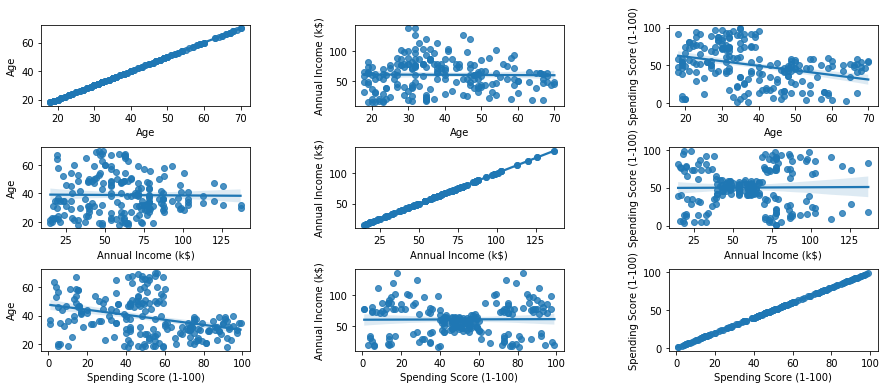

In [34]:
plt.figure(1, figsize = (15,6))
n = 1
for x in num_cols:
    for y in num_cols:
        plt.subplot(len(num_cols), len(num_cols),n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y=y, data = data)
        plt.ylabel(y)
        n+=1
plt.show()
        

<function matplotlib.pyplot.show(*args, **kw)>

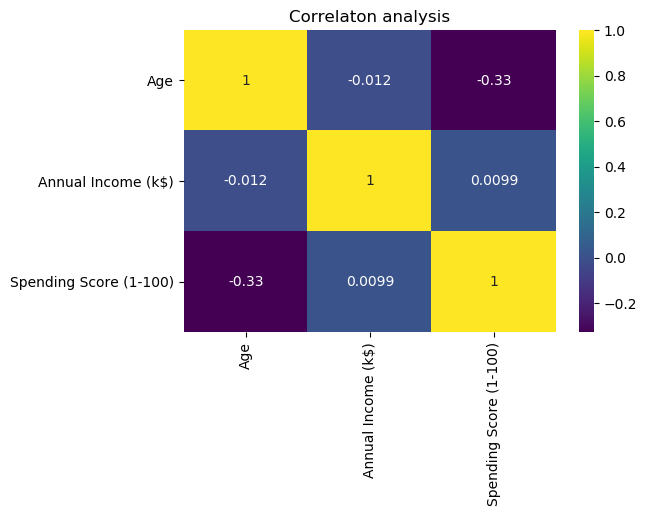

In [21]:
corr = new_data.corr()
plt.figure(dpi = 100)
plt.title('Correlaton analysis')
sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.show

In [45]:
scaler = MinMaxScaler()
for col in num_cols:
    scaler.fit(new_data[[col]])
    new_data[col] = scaler.transform(new_data[[col]])

In [46]:
new_data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,0.019231,0.000000,0.387755
1,Male,0.057692,0.000000,0.816327
2,Female,0.038462,0.008197,0.051020
3,Female,0.096154,0.008197,0.775510
4,Female,0.250000,0.016393,0.397959


In [51]:
k_rng = range(1, 10)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(new_data[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

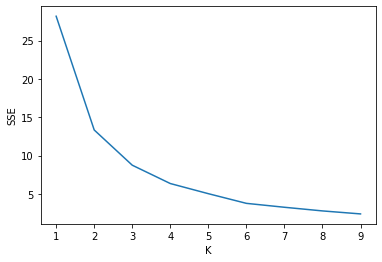

In [52]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')

In [54]:
km_1= KMeans(n_clusters = 2)
y_pred = km_1.fit_predict(new_data[['Age','Spending Score (1-100)']])

In [61]:
data['clusters_1'] = y_pred

In [62]:
new_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters_1
0,Male,0.019231,0.000000,0.387755,1
1,Male,0.057692,0.000000,0.816327,1
2,Female,0.038462,0.008197,0.051020,0
3,Female,0.096154,0.008197,0.775510,1
4,Female,0.250000,0.016393,0.397959,1


No handles with labels found to put in legend.


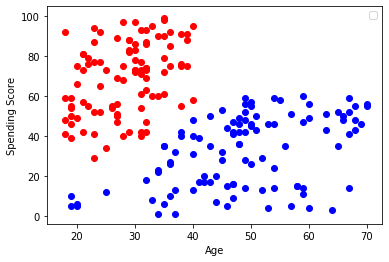

In [63]:
df1 = data[data.clusters_1 == 0]
df2 = data[data.clusters_1 == 1]

plt.scatter(df1['Age'], df1['Spending Score (1-100)'], color = 'blue' )
plt.scatter(df2['Age'], df2['Spending Score (1-100)'], color = 'red' )

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

In [64]:
k_rng = range(1, 10)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(new_data[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

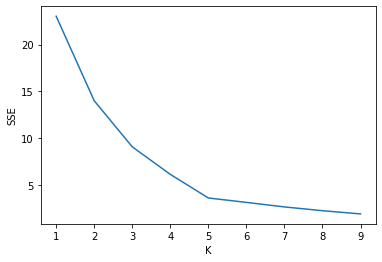

In [65]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')

In [66]:
km_1= KMeans(n_clusters = 5)
y_pred = km_1.fit_predict(new_data[['Annual Income (k$)','Spending Score (1-100)']])

In [67]:
data['clusters_2'] = y_pred

In [68]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters_1,clusters_2
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,2


Text(0, 0.5, 'Spending Score')

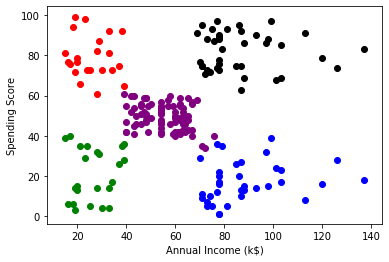

In [76]:
df1 = data[data.clusters_2 == 0]
df2 = data[data.clusters_2 == 1]
df3 = data[data.clusters_2 == 2]
df4 = data[data.clusters_2 == 3]
df5 = data[data.clusters_2 == 4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color = 'blue' )
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color = 'red' )
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color = 'green' )
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color = 'black' )
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color = 'purple' )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

In [70]:
k_rng = range(1, 10)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(new_data[['Age','Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

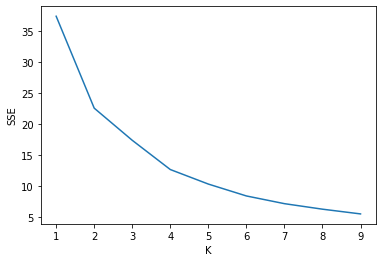

In [71]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')

In [72]:
km_1= KMeans(n_clusters = 4)
y_pred = km_1.fit_predict(new_data[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [73]:
data['clusters_3'] = y_pred

In [74]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters_1,clusters_2,clusters_3
0,1,Male,19,15,39,1,2,0
1,2,Male,21,15,81,1,1,0
2,3,Female,20,16,6,0,2,0
3,4,Female,23,16,77,1,1,0
4,5,Female,31,17,40,1,2,0


Text(0, 0.5, 'Spending Score')

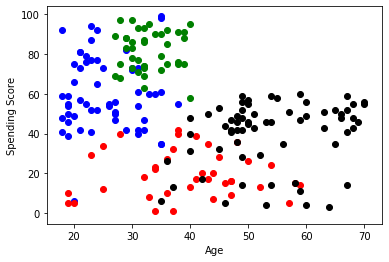

In [78]:
df1 = data[data.clusters_3 == 0]
df2 = data[data.clusters_3 == 1]
df3 = data[data.clusters_3 == 2]
df4 = data[data.clusters_3 == 3]


plt.scatter(df1['Age'], df1['Spending Score (1-100)'], color = 'blue' )
plt.scatter(df2['Age'], df2['Spending Score (1-100)'], color = 'red' )
plt.scatter(df3['Age'], df3['Spending Score (1-100)'], color = 'green' )
plt.scatter(df4['Age'], df4['Spending Score (1-100)'], color = 'black' )


plt.xlabel('Age')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

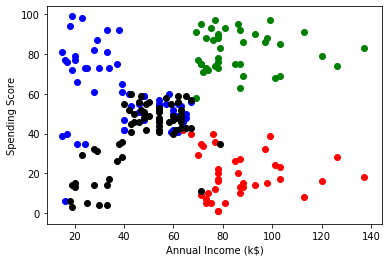

In [81]:
df1 = data[data.clusters_3 == 0]
df2 = data[data.clusters_3 == 1]
df3 = data[data.clusters_3 == 2]
df4 = data[data.clusters_3 == 3]


plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color = 'blue' )
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color = 'red' )
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color = 'green' )
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color = 'black' )


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')